# Introduction


This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
# Attribute Information
id: Identification number of the individual.

gender: Gender of the individual,"Male", "Female" or "Other"


hypertension: Health related parameter, does person have hypertension,0 if the patient doesn't have hypertension, 1 if the patient has hypertension


heart_disease: Health related parameter, does person have heart disease,0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


ever_married: Personal information, is person married on not?


work_type: Nature of work place,"children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


Residence_type: Residence type of the individual,"Rural" or "Urban"


avg_glucose_level: average glucose level in blood for the individual.


bmi: body mass index of the individual.


smoking_status: Habitual information. Current smoking status of individual,"formerly smoked", "never smoked", "smokes" or "Unknown",1 if the patient had a stroke or 0 if not


stroke: Our taget, is person suffered heart attack?


Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# We will use tpot library
TPOT is an open-source Python library for Automated Machine Learning (AutoML). It is built on top of the popular scikit-learn and it uses Gentic Programming (GP) to efficiently discover a top-performing model pipeline for a given dataset.

TPOT uses a version of genetic programming to automatically design and optimize a series of data transformations and machine learning models that attempt to maximize the classification accuracy for a given supervised learning data set.

# Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# Data Importing

In [2]:
data=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprocessing & Cleaning

In [3]:
df=data.copy()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<Axes: title={'center': 'Count (stroke)'}>

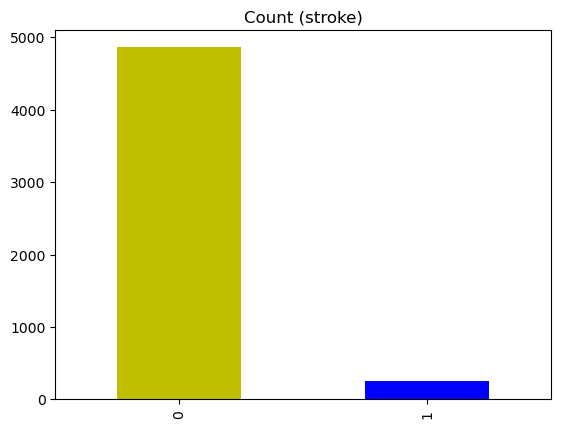

In [4]:
df['stroke'].value_counts().plot(kind='bar', title='Count (stroke)', color=['y', 'b'])

We have the problem of imbalance It means that we need to process the dataset before modeling.

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

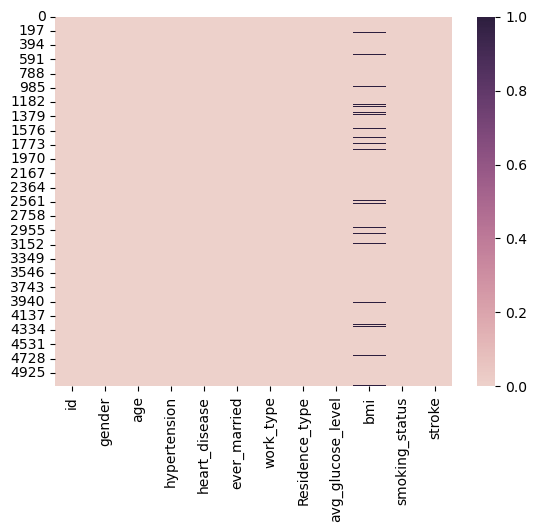

In [6]:
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

In [7]:
df.dropna(subset=['bmi'],inplace=True)

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now we don't have null values

In [9]:
df.duplicated().sum()

0

# Data Visualization

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
fig = px.pie(df, names='gender', title='gender',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

The percentage of women is higher than that of men

<Axes: xlabel='gender', ylabel='count'>

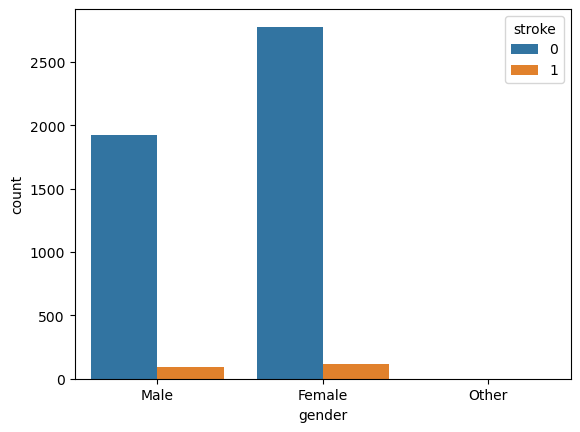

In [13]:
sns.countplot(data=df, x="gender", hue="stroke")

The percentage of women suffering from stroke is slightly higher than that of men

<Axes: xlabel='age', ylabel='Density'>

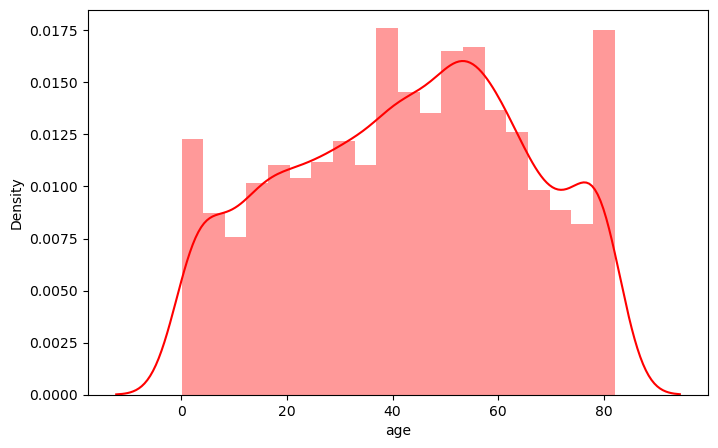

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(df['age'], hist=True, color='red')

Ages range from less than 20 years to nearly eighty years, and most of them are between 40 and 60 years old.

<Axes: xlabel='stroke', ylabel='age'>

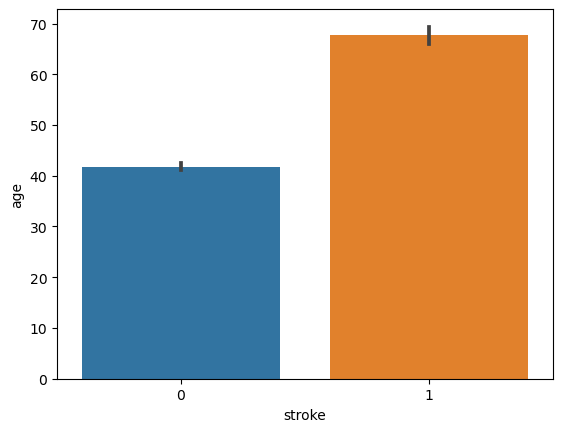

In [15]:
sns.barplot(x='stroke',y='age',data=df)

The higher the age, the higher the incidence of stroke

<Axes: xlabel='hypertension', ylabel='count'>

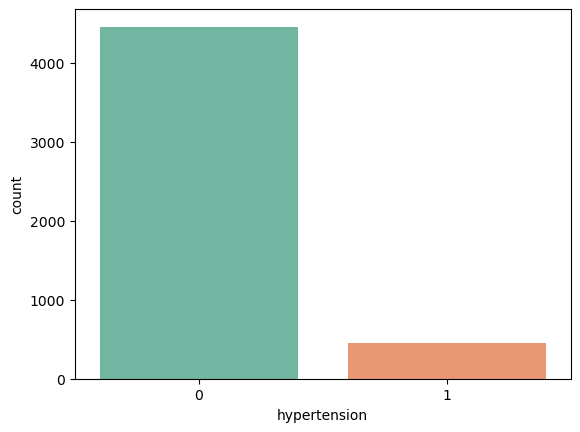

In [16]:
sns.countplot(x= df["hypertension"], palette="Set2")

Most people do not suffer from hypertension

<Axes: xlabel='hypertension', ylabel='count'>

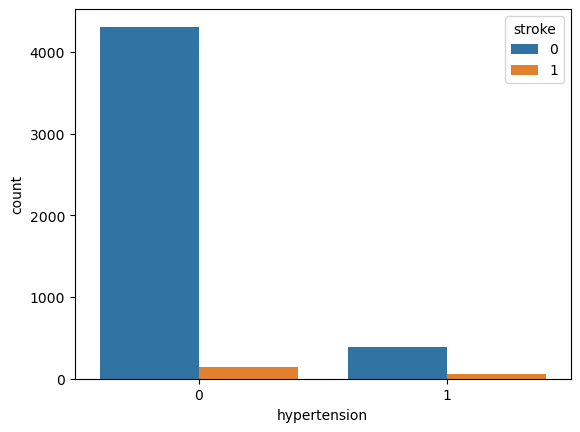

In [17]:
sns.countplot(data=df, x="hypertension", hue="stroke")

In [18]:
fig = px.pie(df,names='heart_disease',title='heart_disease',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

Most people do not have heart disease

<Axes: xlabel='heart_disease', ylabel='count'>

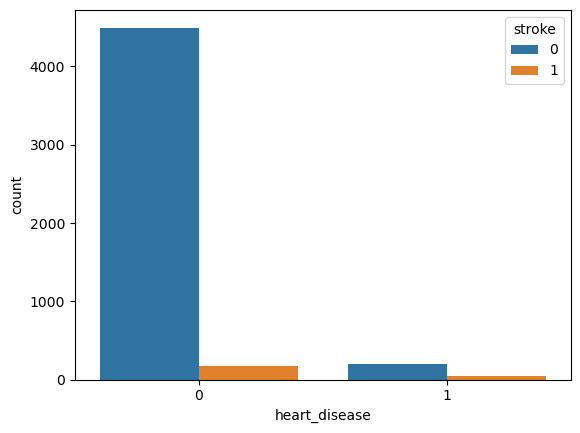

In [19]:
sns.countplot(data=df, x="heart_disease", hue="stroke")

The percentage of stroke patients who also suffer from heart disease is lower than that of stroke patients who do not suffer from heart disease, but the difference is very slight and is not considered significant.

In [20]:
fig = px.pie(df, names='ever_married', title='ever_married',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

The percentage of married people is 65% and the unmarried is approximately 35%

<Axes: xlabel='ever_married', ylabel='count'>

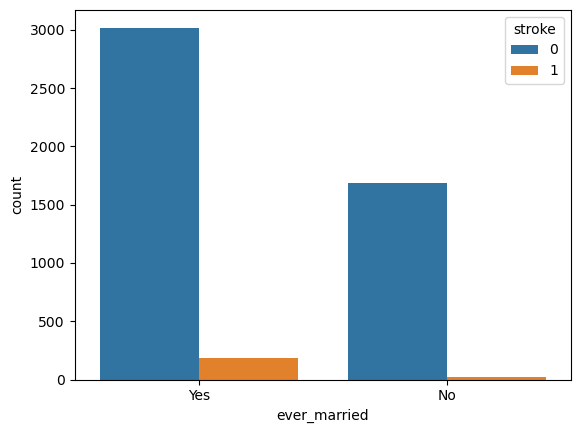

In [21]:
sns.countplot(data=df, x="ever_married", hue="stroke")

The percentage of married people is 65% and the unmarried is approximately 35%

<Axes: xlabel='work_type', ylabel='count'>

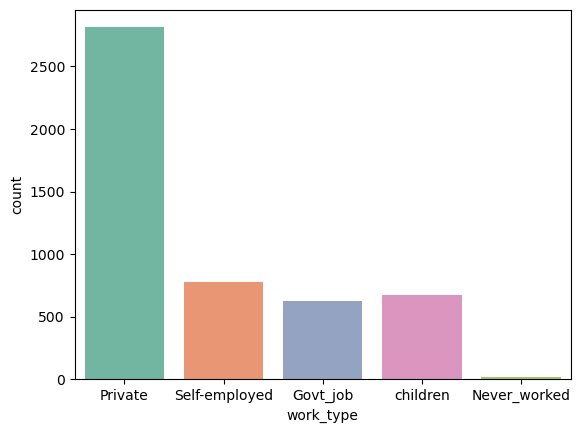

In [22]:
sns.countplot(x= df["work_type"], palette="Set2")

The highest percentage of work type is private, followed by self employed

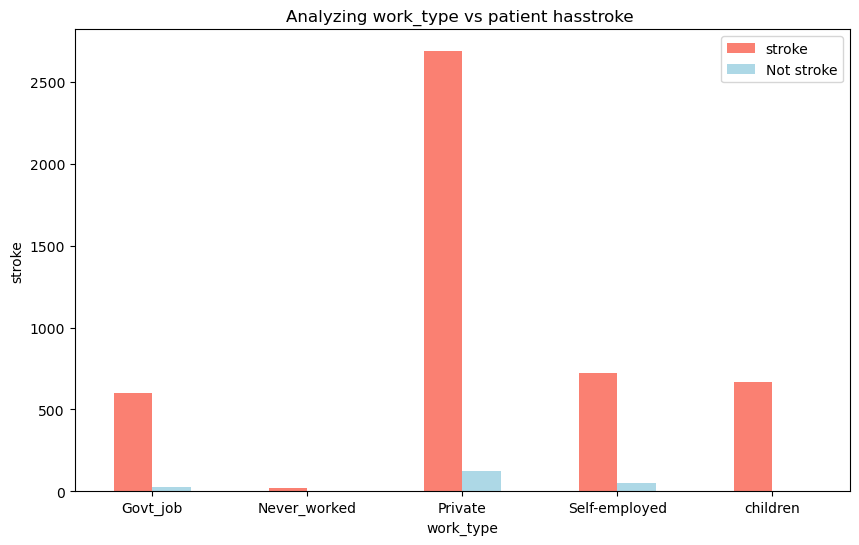

In [23]:
pd.crosstab(df.work_type, df.stroke).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Analyzing work_type vs patient hasstroke ")
plt.xlabel("work_type")
plt.ylabel("stroke")
plt.legend(["stroke", "Not stroke"])
plt.xticks(rotation=0);

People with a private job have the highest risk of stroke, followed by the self-employed

<Axes: xlabel='work_type', ylabel='count'>

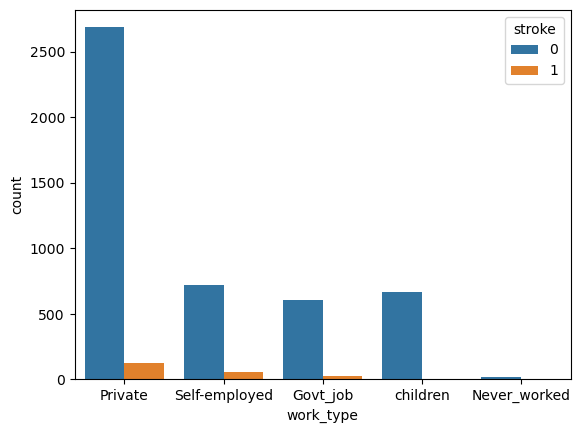

In [24]:
sns.countplot(data=df, x="work_type", hue="stroke")

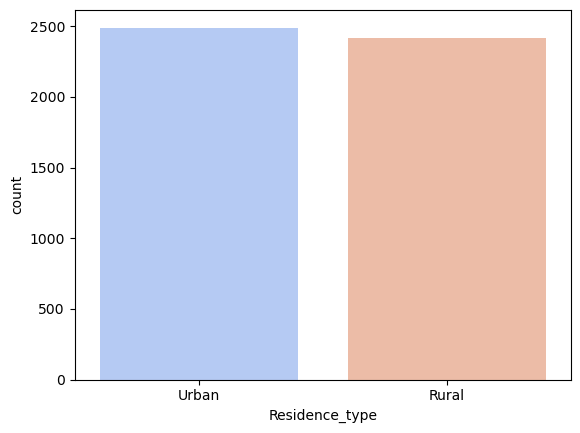

In [25]:
b=sns.countplot(x= 'Residence_type' ,data = df ,palette='coolwarm'  )
plt.show()

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

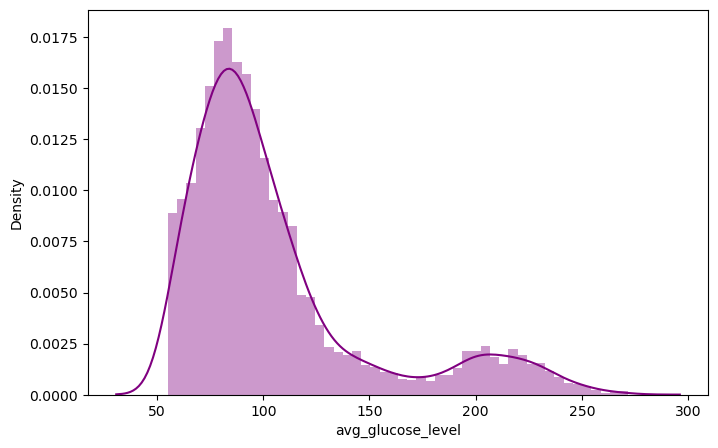

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(df['avg_glucose_level'], hist=True, color='purple')

The glucose level ranges from approximately 60 to 290, and most of them are concentrated between 90 and 180

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

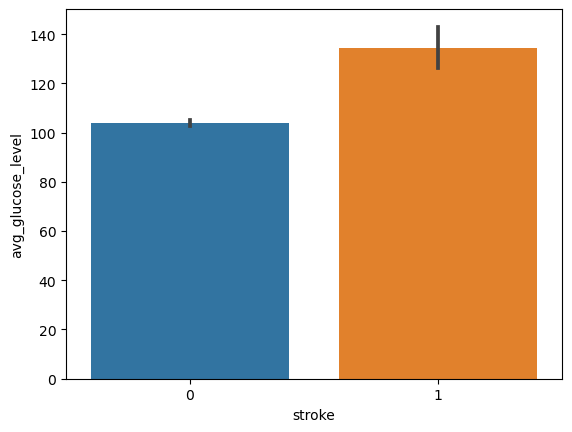

In [27]:
sns.barplot(x='stroke',y='avg_glucose_level',data=df)

The glucose level in stroke patients is higher than that of non-stroke patients

<Axes: xlabel='bmi', ylabel='Density'>

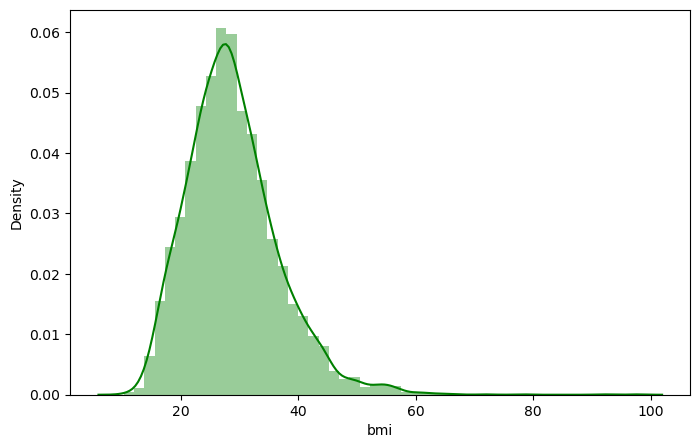

In [28]:
plt.figure(figsize=(8,5))
sns.distplot(df['bmi'], hist=True, color='green')

The value of body mass ranges between 20 and 100, but most of them are concentrated between 30 and 40.

In [29]:
fig = px.pie(df,names='smoking_status',title='smoking_status',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

The highest percentage of non-smokers is 37.7%, followed by former smokers, which is 17.1%, and the lowest percentage among them is current smokers, which is 15%.

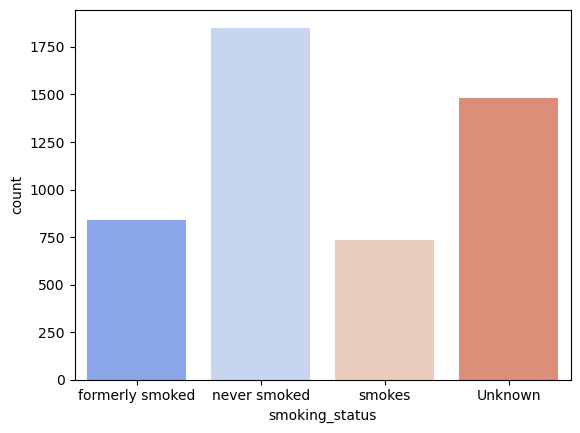

In [30]:
b=sns.countplot(x= 'smoking_status' ,data = df ,palette='coolwarm'  )
plt.show()

<Axes: xlabel='smoking_status', ylabel='count'>

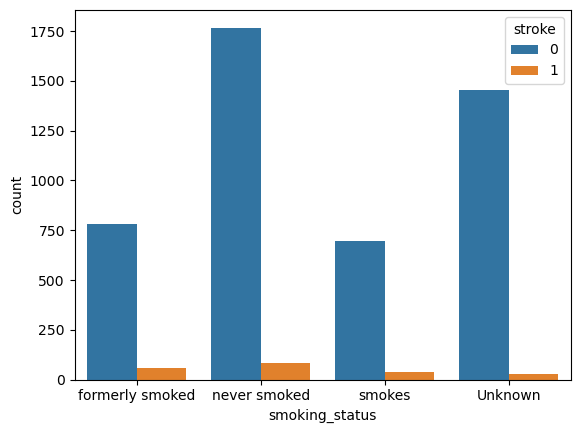

In [31]:
sns.countplot(data=df, x="smoking_status", hue="stroke")

The incidence of stroke among current or former smokers is higher than that of non-smokers

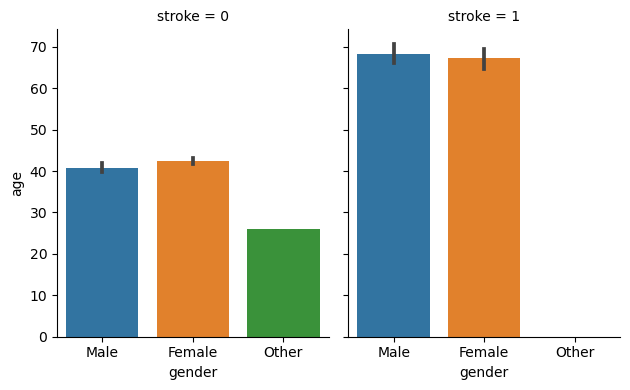

In [32]:
sns.catplot(
    data=df, x="gender", y="age", col="stroke",
    kind="bar", height=4, aspect=.8,
)

# Encoding the string columns

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2811,2490,1852


In [35]:
cols = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

# train_test_split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x=df.drop('stroke',axis=1).values
y=df['stroke'].values

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.1 , random_state= 42)

# Let's dealing with the problem of imbalance in our target column

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 183
Before OverSampling, counts of label '0': 4235 

After OverSampling, the shape of train_X: (8470, 11)
After OverSampling, the shape of train_y: (8470,) 

After OverSampling, counts of label '1': 4235
After OverSampling, counts of label '0': 4235


Now the imbalance problem is solved

In [41]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [42]:
from tpot import TPOTClassifier

In [43]:
from sklearn.datasets import load_digits

In [44]:
digits = load_digits()

In [45]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

In [46]:
tpot.fit(x_train_res, y_train_res )

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9765053128689491

Generation 2 - Current best internal CV score: 0.9765053128689491

Generation 3 - Current best internal CV score: 0.9765053128689491

Generation 4 - Current best internal CV score: 0.977331759149941

Generation 5 - Current best internal CV score: 0.977331759149941

Best pipeline: ExtraTreesClassifier(LinearSVC(input_matrix, C=0.5, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05), bootstrap=True, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=5, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

In [47]:
print(tpot.score(x_test, y_test))

0.9327902240325866


In [48]:
tpot.export('tpot_digits_pipeline.py')

If you found it helpful, do upvote

Feel free to comment

I would love to have suggestions.